## Loading libraries

In [ ]:
import numpy as np
import pandas as pd
import string as st
import random as rn  #For generating/manipulating multiple random numbers
import re            #Regular expression support
import nltk          #For NLP
import os            #For removing & creating a directory(folder), fetching it's contents, changing & identifying the current dictionary

import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go #contains all class definations for objects that make up the plots
import plotly.express as ox         #high-level interface for visulization
import plotly.figure_factory as ff  #for specific plots

from nltk.corpus import stopwords        #For Stop Words
from nltk.tokenize import word_tokenize  #For Tokenisation
from nltk.stem import WordNetLemmatizer  #For Lemmatization
from wordcloud import WordCloud          #For WordCloud


In [ ]:
!pip install nltk

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
import heapq

In [ ]:
import torch

In [ ]:
pip install sumy

In [ ]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

## Loading the Data Set

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Prithvi Cafe.csv")
df.head()

,Review
0,"The place is simply awesome, the environment i..."
1,"Cozy atmosphere, nice hangout open air spot, g..."
2,One of the shining places of Mumbai. Simple an...
3,"Great atmosphere, food is alright, nothing gre..."
4,Prithvi Cafe Restaurant offers an inviting amb...


## WordCloud

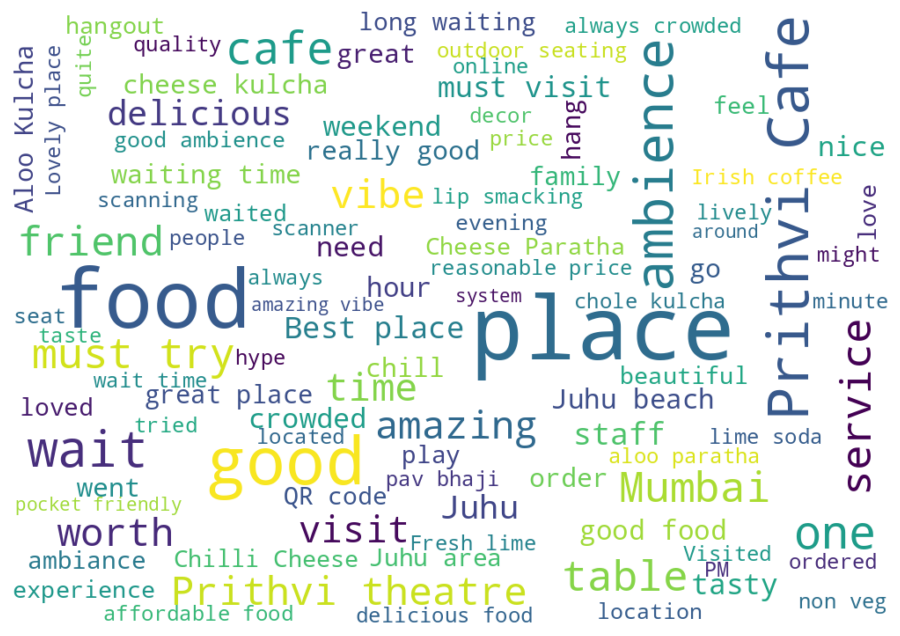

In [ ]:
# Creat a variable by joining all the text values of reviews in df1 with space b/w each word.
# We join/concatenate all the text values of a column in a single string
from wordcloud import WordCloud
txt = ' '.join(rev for rev in df.Review)

plt.figure(figsize = (15,8))

#Creat the WordCloud
wrdcld = WordCloud(#stopwords = stopwords,
                   background_color = 'white',
                   max_font_size = 100,
                   max_words = 100,
                   width = 1000,
                   height = 700).generate(txt)

# Display WordCloud image on plot using 'imshow', interpolation method = 'bilinear' used to enhance image
plt.imshow(wrdcld, interpolation = 'bilinear')
# Now we  need to turn off the axis label
plt.axis('off')
plt.show()

## Overall Sentiment Analysis using Vader Sentiment Intensity Analyser

In [ ]:
df1 = pd.DataFrame(df.duplicated())
# Remove duplicates from the DataFrame
df_without_duplicates = df.drop_duplicates()


In [ ]:
df_without_duplicates

,Review,Sentiment_Score,Predicted_Label
0,"The place is simply awesome, the environment i...",0.9022,Positive
1,"Cozy atmosphere, nice hangout open air spot, g...",0.9432,Positive
2,One of the shining places of Mumbai. Simple an...,0.6554,Positive
3,"Great atmosphere, food is alright, nothing gre...",0.2271,Positive
4,Prithvi Cafe Restaurant offers an inviting amb...,0.9300,Positive
...,...,...,...
1914,The Oreo shake and shawarma was so not good. V...,-0.4046,Negative
1915,was served non-veg food when veg food was orde...,-0.8119,Negative
1916,Amazing ambiance n vibe n delicious food.. li...,0.8745,Positive
1917,Old is gold they said ... Well said. I visited...,0.9099,Positive


In [ ]:
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each review
df['Sentiment_Score'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Assign sentiment labels based on the compound score
df['Predicted_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))

# Print the DataFrame with sentiment analysis results
df

,Review,Sentiment_Score,Predicted_Label
0,"The place is simply awesome, the environment i...",0.9022,Positive
1,"Cozy atmosphere, nice hangout open air spot, g...",0.9432,Positive
2,One of the shining places of Mumbai. Simple an...,0.6554,Positive
3,"Great atmosphere, food is alright, nothing gre...",0.2271,Positive
4,Prithvi Cafe Restaurant offers an inviting amb...,0.9300,Positive
...,...,...,...
1914,The Oreo shake and shawarma was so not good. V...,-0.4046,Negative
1915,was served non-veg food when veg food was orde...,-0.8119,Negative
1916,Amazing ambiance n vibe n delicious food.. li...,0.8745,Positive
1917,Old is gold they said ... Well said. I visited...,0.9099,Positive


In [ ]:
positive_reviews = df[df['Predicted_Label'] == 'Positive']
negative_reviews = df[df['Predicted_Label'] == 'Negative']

# Calculate mean of positive and negative sentiment scores
positive_score = positive_reviews['Sentiment_Score'].mean()
negative_score = negative_reviews['Sentiment_Score'].mean()

# Print mean scores
print("Mean Positive Sentiment Score:", positive_score)
print("Mean Negative Sentiment Score:", negative_score)

Mean Positive Sentiment Score: 0.7493274850299401
Mean Negative Sentiment Score: -0.329893023255814


##### Overall Positive and Negative Percentage of Reviews

In [ ]:
print("Percentage Intensity of Positive Reviews:", round(positive_score,2)*100,"%")
print("Percentage Intensity of Negative Reviews:", abs(round(negative_score,2))*100,"%")

Percentage Intensity of Positive Reviews: 75.0 %
Percentage Intensity of Negative Reviews: 33.0 %


## Text Summarization on Overall Positive and Negative Sentiment

In [ ]:
#del nlargest
# Replace nlargest with a custom implementation
def nlargest(n, iterable, key=None):
    """
    Returns a list of the n largest elements from the iterable,
    as determined by the key function.
    """
    heap = []
    for item in iterable:
        if len(heap) < n:
            heapq.heappush(heap, item)
        else:
            smallest = heapq.heappop(heap)
            if key(item) > key(smallest):
                heapq.heappush(heap, item)
            else:
                heapq.heappush(heap, smallest)
    return heap

In [ ]:
# Filter positive and negative reviews
positive_reviews = df[df['Predicted_Label'] == 'Positive']['Review']
negative_reviews = df[df['Predicted_Label'] == 'Negative']['Review']

# Function to generate summary using word frequency
def generate_summary(text, num_sentences=3):
    # Tokenize text into sentences
    sentences = sent_tokenize(text)

    # Calculate sentence scores based on sentence length
    sentence_scores = {sentence: len(sentence.split()) for sentence in sentences}

    # Get top N sentences with highest scores
    summary_sentences = nlargest(num_sentences, sentence_scores, key=sentence_scores.get)

    return ' '.join(summary_sentences)

# Generate summaries for positive and negative reviews
positive_summary = generate_summary(' '.join(positive_reviews))
negative_summary = generate_summary(' '.join(negative_reviews))

# Print summaries
print("Positive Reviews Summary:")
print(positive_summary)
print("\nNegative Reviews Summary:")
print(negative_summary)

Positive Reviews Summary:
Amazing place tucked in juhu.. food is averagely good.. ambience is good.. and best thing is as per location the place is very pocket friendly..Must visit in case u want a relaxed evening for catching up.. but remember queue … The cafe is good, the food is good too, and lighter on pockets as compared to other cafes in juhu … Prithvi cafe can never disappoint you.The dishes were truly heavenly as if you are in Punjab and it's quite affordable … A very good and reasonable cafe.The ambience is also pretty good for a cafe ,prices are very reasonable and the food is also delicious. … Only a true Mumbaikar will connect to Prithvi Cafe as much as we do with Chilly Cheese Toast at Prithvi Cafe, Had an wonderful experience there with food and environment. … Long waiting period during weekends, but it’s worth it , the Amritsar chole kulcha is a must try … Right beside the well known Prithvi Theatre.. an open-air type seating arrangement.. popular with young people.. it 

In [ ]:
Pos_Summ = """amazing place tucked in juhu.. food is averagely good.. ambience is good.. and best thing is as per location the place is very pocket friendly..
must visit in case u want a relaxed evening for catching up.. but remember queue … the cafe is good, the food is good too,
and lighter on pockets as compared to other cafes in juhu … prithvi cafe can never disappoint you.the dishes were truly heavenly as if you are in punjab
and it's quite affordable … a very good and reasonable cafe.the ambience is also pretty good for a cafe ,prices are very reasonable and the food is also delicious.
the place also has a book store and a theater named as prithvi theater which was built by shashi kapoor.I have heard it serves really good red velvet pastry …
crowded but peacefully serene with creative vibes in the air, prithvi cafe is an integral part of the iconic prithvi theatre in juhu, mumbai. …
long waiting period during weekends, but it’s worth it , the amritsar chole kulcha is a must try … right beside the well known prithvi theatre..
an open-air type seating arrangement.. popular with young people.. it has a chilled vibe. overall a good place to hangout with your friends. vibe check
"""
# Initialize the parser and tokenizer
parser_pos = PlaintextParser.from_string(Pos_Summ, Tokenizer("english"))

# Initialize the LSA summarizer and specify the number of sentences in the summary
lsa_summarizer = LsaSummarizer()
lsa_summary = lsa_summarizer(parser_pos.document, sentences_count=2)  # Adjust sentences_count for desired length

# Generate the summary
pos_summary = " ".join(str(sentence) for sentence in lsa_summary)

print(pos_summary)

In [ ]:
# Create a DataFrame
df_sent = pd.DataFrame({'Pos_Summ': [Pos_Summ], 'pos_summary': [pos_summary]})
df_sent

,Pos_Summ,pos_summary
0,amazing place tucked in juhu.. food is average...,the place also has a book store and a theater ...


In [ ]:
Neg_Summ ="""the qr menu is a pain .i had ordered pasta and paneerwrap and apple cinnamon muffins and only the muffins were awesome .pasta was not bad but undercooked and paneer wrap a total disaster .who puts cold not even cooked french fries in paneer wrap and paneer. it's an open area café so no ac there. the place is good, i won't say excellent but good. no proper parking space..book table before you go as it get flooded with people on weekends.
"""
# Initialize the parser and tokenizer
parser_neg = PlaintextParser.from_string(Neg_Summ, Tokenizer("english"))

# Initialize the LSA summarizer and specify the number of sentences in the summary
lsa_summarizer = LsaSummarizer()
lsa_summary = lsa_summarizer(parser_neg.document, sentences_count=2)  # Adjust sentences_count for desired length

# Generate the summary
neg_summary = " ".join(str(sentence) for sentence in lsa_summary)

print(neg_summary)

it's an open area café so no ac there. no proper parking space..book table before you go as it get flooded with people on weekends.


In [ ]:
print("Overall Positive Reviews' Summary:")
print(pos_summary)
print("Overall Negative Reviews' Summary:")
print(neg_summary)

Overall Positive Reviews' Summary:
the place also has a book store and a theater named as prithvi theater which was built by shashi kapoor.I have heard it serves really good red velvet pastry … crowded but peacefully serene with creative vibes in the air, prithvi cafe is an integral part of the iconic prithvi theatre in juhu, mumbai. … long waiting period during weekends, but it’s worth it , the amritsar chole kulcha is a must try … right beside the well known prithvi theatre.. an open-air type seating arrangement.. popular with young people.. it has a chilled vibe.
Overall Negative Reviews' Summary:
it's an open area café so no ac there. no proper parking space..book table before you go as it get flooded with people on weekends.


## Pre-Processing

In [ ]:
df = df.drop(["Sentiment_Score","Predicted_Label"],axis = 1)

In [ ]:
df.head()

,Review
0,"the place is simply awesome, the environment i..."
1,you need to wait to get seats in this cafe as ...
2,we waited for minutes
3,the food is good at reasonable prices
4,you need to place an order on their website


### 1. Lowercasing

In [ ]:
df["Review"] = df["Review"].str.lower()

### 2. Splitting the function by period.

In [ ]:
# Function to split a sentence into parts based on commas and periods
def split_sentence(sentence):
    return [part.strip() for part in sentence.split('.') if part.strip()]

# Apply the function to the 'sentences' column and explode the resulting list
df['Review'] = df['Review'].apply(split_sentence)
df = df.explode('Review')

# Reset index
df.reset_index(drop=True, inplace=True)


### 3. Punctuation Removal

In [ ]:
# Define a function to remove non-alphabetic characters except commas
def punkt_removal(sentence):
    # Ensure the input is a string
    if isinstance(sentence, str):
        # Remove non-alphabetic characters except commas using regular expressions
        sentence = re.sub(r'[^a-zA-Z,\s]', '', sentence)
    return sentence

# Apply the function to the 'Review' column
df['Review'] = df['Review'].apply(punkt_removal)


### Dropping NA Values

In [ ]:
# Remove NaN values from the 'Review' column
df = df.dropna(subset=['Review'])


### Removing Emojies


In [ ]:
def emoji_removal(sentence):
    # Remove emojis using regular expressions
    sentence = sentence.encode('ascii', 'ignore').decode('ascii')
    return sentence

df['Review'] = df['Review'].apply(emoji_removal)

### Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

df['Review'] = df['Review'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


### Remove sentences with more than two words  

In [ ]:
df = df[df['Review'].apply(lambda x: len(x.split()) > 2)]
df

,Review
0,"the place is simply awesome, the environment i..."
1,you need to wait to get seat in this cafe a us...
2,we waited for minute
3,the food is good at reasonable price
4,you need to place an order on their website
...,...
6828,now about the food
6830,amazing place amazing ambience and pocket frie...
6831,great for a evening dine out
6832,just few kilometer from vileparle station


## Topic Modelling using LDA

In [ ]:
# Assuming df["Review"] contains your text data
vectorizer = TfidfVectorizer(max_features=500)
reviews_vectorized = vectorizer.fit_transform(df["Review"])

n_topics = 4  # Since you want 4 topics: food, service, ambience, locality

lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(reviews_vectorized)

# Transform the data to obtain topic distributions
topic_distributions = lda_model.transform(reviews_vectorized)

# Define topic labels
topic_labels = ["price","service","food","ambience"]

# Assign topics to your data based on the topic distributions
df["topic"] = [topic_labels[i] for i in topic_distributions.argmax(axis=1)]

,Review,topic
0,"the place is simply awesome, the environment i...",ambience
1,you need to wait to get seat in this cafe a us...,service
2,we waited for minute,ambience
3,the food is good at reasonable price,price
4,you need to place an order on their website,service
...,...,...
6828,now about the food,ambience
6830,amazing place amazing ambience and pocket frie...,service
6831,great for a evening dine out,price
6832,just few kilometer from vileparle station,ambience


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
## Create separate DataFrames for each topic
food_df = df[df["topic"] == "food"]
service_df = df[df["topic"] == "service"]
ambience_df = df[df["topic"] == "ambience"]
price_df = df[df["topic"] == "price"]
#price_df = df[df["topic"] == "price"]

# Optionally, you may want to drop the "topic" column from these DataFrames
food_df.drop(columns=["topic"], inplace=True)
service_df.drop(columns=["topic"], inplace=True)
ambience_df.drop(columns=["topic"], inplace=True)
price_df.drop(columns=["topic"], inplace=True)
#price_df.drop(columns = ["topic"],inplace = True)

In [ ]:
food_df.head()

,Review
8,except wait time a they dont take booking
16,must try stuff cheese kulcha blueberry cheese ...
18,we order kulcha panner cheese chole and peach ...
19,but the taste wa avg
22,the standout dish like the kulcha aloopyaaz an...


In [ ]:
service_df.head()

,Review
1,you need to wait to get seat in this cafe a us...
4,you need to place an order on their website
6,"cozy atmosphere, nice hangout open air spot, g..."
7,young crowd and affordable food
9,"food is average, service is good but atmospher..."


In [ ]:
price_df.head()

,Review
3,the food is good at reasonable price
5,it a must have experience in mumbai if you are...
10,must try for outsider if they like art
12,simple and between the tree sitting arrangement
17,"great atmosphere, food is alright, nothing great"


In [ ]:
ambience_df.head()

,Review
0,"the place is simply awesome, the environment i..."
2,we waited for minute
13,they have scanner to place an order and payment
27,"awesome vibe, suber fast service, usually full..."
34,"great food, ambiance and menu option"


## Sentiment Analysis using Multilingual Bert

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

### Food Based Sentiment Analysis

In [ ]:
food_df['sentiment'] = food_df['Review'].apply(lambda x: sentiment_score(x[:512]))
food_df

,Review,sentiment
8,except wait time a they dont take booking,3
16,must try stuff cheese kulcha blueberry cheese ...,4
18,we order kulcha panner cheese chole and peach ...,4
19,but the taste wa avg,3
22,the standout dish like the kulcha aloopyaaz an...,5
...,...,...
6807,though the quality of food and it presentation...,3
6809,waiting time is long here a it is too busy,2
6811,the oreo shake and shawarma wa so not good,1
6815,wa very disappointed and all the manager said ...,1


In [ ]:
# Assuming you have a sentiment score column named "Sentiment" in your DataFrame
food_sentiment = food_df["sentiment"].mean()

print("Overall Sentiment for Food DataFrame:", food_sentiment)


Overall Sentiment for Food DataFrame: 3.773718326458456


### Service Based Sentiment Analysis

In [ ]:
service_df['sentiment'] = service_df['Review'].apply(lambda x: sentiment_score(x[:512]))
service_df

,Review,sentiment
1,you need to wait to get seat in this cafe a us...,3
4,you need to place an order on their website,3
6,"cozy atmosphere, nice hangout open air spot, g...",4
7,young crowd and affordable food,4
9,"food is average, service is good but atmospher...",3
...,...,...
6816,we had jain people with u and they were served...,1
6820,little crowded bt still worth visiting,4
6826,it very popular in juhu area,5
6830,amazing place amazing ambience and pocket frie...,5


In [ ]:
# Assuming you have a sentiment score column named "Sentiment" in your DataFrame
service_sentiment = service_df["sentiment"].mean()

print("Overall Sentiment for Food DataFrame:", service_sentiment)

Overall Sentiment for Food DataFrame: 3.956845238095238


### Ambience Based Sentiment Analysis

In [ ]:
ambience_df['sentiment'] = ambience_df['Review'].apply(lambda x: sentiment_score(x[:512]))
ambience_df

,Review,sentiment
0,"the place is simply awesome, the environment i...",5
2,we waited for minute,1
13,they have scanner to place an order and payment,4
27,"awesome vibe, suber fast service, usually full...",4
34,"great food, ambiance and menu option",5
...,...,...
6812,very upsetting to see such a quality drop,1
6824,i visited prithivi cafe with bunch of my frien...,1
6827,because of prithivi theater,3
6828,now about the food,4


In [ ]:
# Assuming you have a sentiment score column named "Sentiment" in your DataFrame
ambience_sentiment = ambience_df["sentiment"].mean()

print("Overall Sentiment for Food DataFrame:", ambience_sentiment)


Overall Sentiment for Food DataFrame: 4.102290076335878


### Price Based Sentiment Analysis

In [ ]:
price_df['sentiment'] = price_df['Review'].apply(lambda x: sentiment_score(x[:512]))
price_df

,Review,sentiment
3,the food is good at reasonable price,4
5,it a must have experience in mumbai if you are...,5
10,must try for outsider if they like art,3
12,simple and between the tree sitting arrangement,4
17,"great atmosphere, food is alright, nothing great",3
...,...,...
6810,one should always come here with more time in ...,5
6814,wa served nonveg food when veg food wa ordered,1
6822,old is gold they said,1
6825,the ambience is great,5


In [ ]:
# Assuming you have a sentiment score column named "Sentiment" in your DataFrame
price_sentiment = price_df["sentiment"].mean()

print("Overall Sentiment for Food DataFrame:", price_sentiment)

Overall Sentiment for Food DataFrame: 3.8059508408796896


### Sentiment Scores with respect to all identified aspects


In [ ]:
print("Overall Sentiment for Food:", round(food_sentiment,2))
print("Overall Sentiment for Service:", round(service_sentiment,2))
print("Overall Sentiment for Ambience:", round(ambience_sentiment,2))
print("Overall Sentiment for Locality:", round(price_sentiment,2))

Overall Sentiment for Food: 3.77
Overall Sentiment for Service: 3.96
Overall Sentiment for Ambience: 4.1
Overall Sentiment for Locality: 3.81


## POS Tagging

In [ ]:
tags = pd.read_csv('/content/NER_tags.csv')
tags = pd.DataFrame(tags)

In [ ]:
tags.columns

Index(['ambience', 'service', 'price', 'food', 'location', 'restaurant'], dtype='object')

In [ ]:
ambience_phrase = tags['ambience'].dropna().tolist()
dish_phrases = tags['food'].dropna().tolist()
service_phrase = tags['service'].dropna().tolist()
location_phrase = tags['location'].dropna().tolist()
price_phrase = tags['price'].dropna().tolist()

In [ ]:
from nltk.tokenize import word_tokenize
# Join the words into a single string
ambience_txt = ' '.join(ambience_phrase)
dish_txt = ' '.join(dish_phrases)
service_txt = ' '.join(service_phrase)
location_txt = ' '.join(location_phrase)
price_txt = ' '.join(price_phrase)

In [ ]:
# Tokenize the text into tokens
ambience_phrase1 = word_tokenize(ambience_txt)
dish_phrase1 = word_tokenize(dish_txt)
service_phrase1 = word_tokenize(service_txt)
location_phrase1 = word_tokenize(location_txt)
price_phrase1 = word_tokenize(price_txt)
# Print the tokens
#print("Tokens:", tokens)

In [ ]:
import spacy
from spacy.matcher import PhraseMatcher

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define custom labels mapping from POS tags including new tags for dishes and ambience
pos_to_label = {
    'NOUN': 'NOUN',
    'PROPN': 'PROPN',
    'VERB': 'ACTION',
    'ADJ': 'ADJ',
    'ADV': 'ADV',
    'PRON': 'PRON',
    'DISH_NOUN': 'DISH',
    'AMBIENCE': 'AMBIENCE',
    'SERVICE':'SERVICE',
    'PRICE':'PRICE',
    'LOCATION':'LOCATION'
}


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
# Function to annotate sentences with custom labels (including new tags)
def annotate_sentence(sentence):
    doc = nlp(sentence)
    tokens_labels = []

    # Initialize phrase matcher
    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('DISH_NOUN', None, *[nlp(phrase) for phrase in dish_phrase1])
    matcher.add('AMBIENCE', None, *[nlp(phrase) for phrase in ambience_phrase1])
    matcher.add('SERVICE', None, *[nlp(phrase) for phrase in service_phrase1])
    matcher.add('PRICE', None, *[nlp(phrase) for phrase in price_phrase1])
    matcher.add('LOCATION', None, *[nlp(phrase) for phrase in location_phrase1])

    # Iterate through tokens and assign labels based on POS tags and phrase matching
    for token in doc:
        if token.pos_ == 'NOUN' or token.pos_ == 'PROPN' or token.pos_ == 'VERB' or token.pos_ == 'ADV' or token.pos_ == 'ADJ':
            # Check for phrase matches to identify dish names and ambience
            matches = matcher(nlp(token.text))
            if matches:
                match_id, start, end = matches[0]
                if nlp.vocab.strings[match_id] == 'DISH_NOUN':
                    tokens_labels.append((token.text, 'DISH_NOUN'))
                elif nlp.vocab.strings[match_id] == 'AMBIENCE':
                    tokens_labels.append((token.text, 'AMBIENCE'))
                elif nlp.vocab.strings[match_id] == 'SERVICE':
                    tokens_labels.append((token.text, 'SERVICE'))
                elif nlp.vocab.strings[match_id] == 'PRICE':
                    tokens_labels.append((token.text, 'PRICE'))
                elif nlp.vocab.strings[match_id] == 'LOCATION':
                    tokens_labels.append((token.text, 'LOCATION'))
                else:
                    tokens_labels.append((token.text, pos_to_label.get(token.pos_, 'OTHER')))
            else:
                tokens_labels.append((token.text, pos_to_label.get(token.pos_, 'OTHER')))
        else:
            tokens_labels.append((token.text, pos_to_label.get(token.pos_, 'OTHER')))

    return tokens_labels

#### Food POS

In [ ]:
# Filter rows with sentiment = 1
senti_N_food = food_df[(food_df['sentiment'] == 1) | (food_df['sentiment'] == 2)]

# Filter rows with sentiment = 5
senti_P_food = food_df[(food_df['sentiment'] == 5) | (food_df['sentiment'] == 4)]

# Concatenate the two DataFrames
food_df_res = pd.concat([senti_N_food, senti_P_food])

# Reset index
food_df_res.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
food_df_res

,Review,sentiment
0,food taste is unforgettable,1
1,"a place with no fancy arrangements, no loud music",2
2,staff is too helpful,2
3,food taste is unforgettable,1
4,"a place with no fancy arrangements, no loud music",2
...,...,...
1344,ambience is good,4
1345,the dish were truly heavenly a if you are in p...,5
1346,"the ambience is also pretty good for a cafe ,p...",4
1347,it a best place for variety of parathas and ku...,5


In [ ]:
# Group by sentiment and concatenate the reviews within each group
food_df_res = food_df_res.groupby('sentiment')['Review'].apply(lambda x: ' '.join(x)).reset_index()

# Map sentiment values to desired groups
sentiment_mapping = {
    1: 'Group1',  # Sentiment values 1 & 2 grouped as 'Group1'
    2: 'Group1',  # Sentiment values 1 & 2 grouped as 'Group1'
    4: 'Group2',  # Sentiment values 4 & 5 grouped as 'Group2'
    5: 'Group2'   # Sentiment values 4 & 5 grouped as 'Group2'
}

# Apply sentiment mapping to create a new 'group' column
food_df_res['group'] = food_df_res['sentiment'].map(sentiment_mapping)

# Filter rows based on the new 'group' column
food_df_res = food_df_res[food_df_res['group'].isin(['Group1', 'Group2'])]

# Select exactly 2 rows from each group
food_df_res = food_df_res.groupby('group').apply(lambda x: x.sample(n=2)).reset_index(drop=True)

In [ ]:
food_df_res.drop('sentiment', axis = 1, inplace = True)
food_final_df = food_df_res.groupby('group')['Review'].apply(lambda x: ' '.join(x)).reset_index()

In [ ]:
food_final_df

,group,Review
0,Group1,"a place with no fancy arrangements, no loud mu..."
1,Group2,must try stuff cheese kulcha blueberry cheese ...


In [ ]:
food_neg = food_final_df.loc[0,'Review']
food_neg

'a place with no fancy arrangements, no loud music staff is too helpful a place with no fancy arrangements, no loud music staff is too helpful too much waiting time we went there after watching review but it did not match with our expectation a place with no fancy arrangements, no loud music staff is too helpful too much waiting time we went there after watching review but it did not match with our expectation pasta wa not bad but undercooked and paneer wrap a total disaster did not exactly enjoy the system of sharing the waiting is not worth it a place with no fancy arrangements, no loud music staff is too helpful too much waiting time we went there after watching review but it did not match with our expectation did not exactly enjoy the system of sharing the waiting is not worth it and i didnt get a chance to do that because of lack of time perhaps next time if i am around dont miss the chaai a place with no fancy arrangements, no loud music staff is too helpful too much waiting time

In [ ]:
neg_food_tokens = annotate_sentence(food_neg)
print(neg_food_tokens)

[('a', 'OTHER'), ('place', 'NOUN'), ('with', 'OTHER'), ('no', 'OTHER'), ('fancy', 'ADJ'), ('arrangements', 'NOUN'), (',', 'OTHER'), ('no', 'OTHER'), ('loud', 'AMBIENCE'), ('music', 'NOUN'), ('staff', 'SERVICE'), ('is', 'OTHER'), ('too', 'ADV'), ('helpful', 'ADJ'), ('a', 'OTHER'), ('place', 'NOUN'), ('with', 'OTHER'), ('no', 'OTHER'), ('fancy', 'ADJ'), ('arrangements', 'NOUN'), (',', 'OTHER'), ('no', 'OTHER'), ('loud', 'AMBIENCE'), ('music', 'NOUN'), ('staff', 'SERVICE'), ('is', 'OTHER'), ('too', 'ADV'), ('helpful', 'ADJ'), ('too', 'ADV'), ('much', 'ADJ'), ('waiting', 'ACTION'), ('time', 'SERVICE'), ('we', 'PRON'), ('went', 'ACTION'), ('there', 'ADV'), ('after', 'OTHER'), ('watching', 'ACTION'), ('review', 'NOUN'), ('but', 'OTHER'), ('it', 'PRON'), ('did', 'OTHER'), ('not', 'OTHER'), ('match', 'ACTION'), ('with', 'OTHER'), ('our', 'PRON'), ('expectation', 'NOUN'), ('a', 'OTHER'), ('place', 'NOUN'), ('with', 'OTHER'), ('no', 'OTHER'), ('fancy', 'ADJ'), ('arrangements', 'NOUN'), (',', 'OT

In [ ]:
# Filter tokens with 'DISH_NOUN' tag
neg_dishes = [token[0] for token in neg_food_tokens if token[1] == 'DISH_NOUN']

# Print extracted dish nouns
print("Extracted Dish Nouns:")
print(neg_dishes)

Extracted Dish Nouns:
['pasta', 'paneer', 'wrap', 'bread', 'masala', 'tea', 'bread', 'masala', 'tea', 'fish', 'bread', 'masala', 'tea', 'cake', 'muffin', 'served', 'veg', 'veg', 'dish', 'oreo', 'shawarma', 'meal']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert dish nouns into a string (required format for CountVectorizer)
dishes_neg = ' '.join(neg_dishes)

# Create CountVectorizer
vectorizer = CountVectorizer()

# Compute TF (Term Frequency) scores
tf_matrix = vectorizer.fit_transform([dishes_neg])

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get TF scores for each feature
tf_scores = tf_matrix.toarray().flatten()

# Create a dictionary mapping each word to its TF score
word_tf_dict = dict(zip(feature_names, tf_scores))

# Sort words based on TF score in descending order
sorted_words_by_tf = sorted(word_tf_dict.items(), key=lambda x: x[1], reverse=True)
W
# Print the most frequent words based on TF scores
print("Most frequent words based on TF scores for Negative Food Reviews:")
for word, score in sorted_words_by_tf:
    print(f"{word}: {score}")

Most frequent words based on TF scores for Negative Food Reviews:
bread: 3
masala: 3
tea: 3
veg: 2
cake: 1
dish: 1
fish: 1
meal: 1
muffin: 1
oreo: 1
paneer: 1
pasta: 1
served: 1
shawarma: 1
wrap: 1


In [ ]:
filtered_words = [(word) for word, score in sorted_words_by_tf if score > 2]

# Create DataFrame from filtered words
df_1 = pd.DataFrame(filtered_words, columns=["Word"])

# Display the DataFrame
print("Words with Score > 2:")
df_1

Words with Score > 2:


,Word
0,bread
1,masala
2,tea


In [ ]:
food_pos = food_final_df.loc[1,'Review']
food_pos

'must try stuff cheese kulcha blueberry cheese cake , yumm and le sugar, enjoyed the cakeorange juice forgot the exact name the size wa good but we order kulcha panner cheese chole and peach drink a per the suggestion by the staff i liked the chole kulcha and the chai place is good, ambience is good well maintained and clean the saga continues the food wa good must try stuff cheese kulcha blueberry cheese cake , yumm and le sugar, enjoyed the cakeorange juice forgot the exact name the size wa good but we order kulcha panner cheese chole and peach drink a per the suggestion by the staff i liked the chole kulcha and the chai place is good, ambience is good well maintained and clean the saga continues the food wa good good food, plenty of variety, the only hitch is that it is crowded and you need to wait for a table, but they have streamlined that too food is tasty they also have increased the price of food item but i will assure you that the wait is worth it, it outdoor seating make it m

In [ ]:
pos_food_tokens = annotate_sentence(food_pos)
print(pos_food_tokens)

[('must', 'OTHER'), ('try', 'ACTION'), ('stuff', 'NOUN'), ('cheese', 'DISH_NOUN'), ('kulcha', 'DISH_NOUN'), ('blueberry', 'DISH_NOUN'), ('cheese', 'DISH_NOUN'), ('cake', 'DISH_NOUN'), (',', 'OTHER'), ('yumm', 'ADJ'), ('and', 'OTHER'), ('le', 'PROPN'), ('sugar', 'PROPN'), (',', 'OTHER'), ('enjoyed', 'ACTION'), ('the', 'OTHER'), ('cakeorange', 'NOUN'), ('juice', 'DISH_NOUN'), ('forgot', 'ACTION'), ('the', 'OTHER'), ('exact', 'ADJ'), ('name', 'NOUN'), ('the', 'OTHER'), ('size', 'PRICE'), ('wa', 'OTHER'), ('good', 'PRICE'), ('but', 'OTHER'), ('we', 'PRON'), ('order', 'ACTION'), ('kulcha', 'DISH_NOUN'), ('panner', 'PROPN'), ('cheese', 'DISH_NOUN'), ('chole', 'DISH_NOUN'), ('and', 'OTHER'), ('peach', 'DISH_NOUN'), ('drink', 'ACTION'), ('a', 'PRON'), ('per', 'OTHER'), ('the', 'OTHER'), ('suggestion', 'AMBIENCE'), ('by', 'OTHER'), ('the', 'OTHER'), ('staff', 'SERVICE'), ('i', 'PRON'), ('liked', 'ACTION'), ('the', 'OTHER'), ('chole', 'DISH_NOUN'), ('kulcha', 'DISH_NOUN'), ('and', 'OTHER'), ('th

In [ ]:
pos_dishes = [token[0] for token in pos_food_tokens if token[1] == 'DISH_NOUN']

# Print extracted dish nouns
print("Extracted Dish Nouns:")
print(pos_dishes)

Extracted Dish Nouns:
['cheese', 'kulcha', 'blueberry', 'cheese', 'cake', 'juice', 'kulcha', 'cheese', 'chole', 'peach', 'chole', 'kulcha', 'cheese', 'kulcha', 'blueberry', 'cheese', 'cake', 'juice', 'kulcha', 'cheese', 'chole', 'peach', 'chole', 'kulcha', 'cheese', 'kulcha', 'blueberry', 'cheese', 'cake', 'juice', 'kulcha', 'cheese', 'chole', 'peach', 'chole', 'kulcha', 'chole', 'kulcha', 'cheese', 'kulcha', 'blueberry', 'cheese', 'cake', 'juice', 'kulcha', 'cheese', 'chole', 'peach', 'chole', 'kulcha', 'chole', 'kulcha', 'served', 'are', 'cheese', 'kulcha', 'blueberry', 'cheese', 'cake', 'juice', 'kulcha', 'cheese', 'chole', 'peach', 'chole', 'kulcha', 'chole', 'kulcha', 'served', 'are', 'served', 'cheese', 'kulcha', 'blueberry', 'cheese', 'cake', 'juice', 'kulcha', 'cheese', 'chole', 'peach', 'chole', 'kulcha', 'chole', 'kulcha', 'served', 'are', 'served', 'shawarma', 'sandwich', 'garlic', 'bread', 'cheese', 'paratha', 'brownie', 'cheese', 'kulcha', 'blueberry', 'cheese', 'cake', 'j

In [ ]:
# Convert dish nouns into a string (required format for CountVectorizer)
dishes_pos = ' '.join(pos_dishes)

# Create CountVectorizer
vectorizer = CountVectorizer()

# Compute TF (Term Frequency) scores
tf_matrix = vectorizer.fit_transform([dishes_pos])

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get TF scores for each feature
tf_scores = tf_matrix.toarray().flatten()

# Create a dictionary mapping each word to its TF score
word_tf_dict = dict(zip(feature_names, tf_scores))

# Sort words based on TF score in descending order
sorted_words_by_tf = sorted(word_tf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words based on TF scores
print("Most frequent words based on TF scores for Positive Food Reviews:")
for word, score in sorted_words_by_tf:
    print(f"{word}: {score}")

Most frequent words based on TF scores for Positive Food Reviews:
kulcha: 96
cheese: 64
chole: 55
pizza: 40
dish: 34
paratha: 29
paneer: 27
served: 24
pasta: 22
sandwich: 22
are: 21
biryani: 19
brownie: 19
mojito: 19
cake: 16
pastry: 15
aloopyaaz: 14
blueberry: 14
juice: 14
peach: 14
watermelon: 14
jalapeno: 13
mushroom: 13
cafe: 10
keema: 10
pav: 10
bread: 9
garlic: 9
shawarma: 9
choco: 8
roll: 6
beer: 3
bottle: 3
butter: 3
chicken: 3
chilli: 1
hariyali: 1
mix: 1
sauce: 1
whole: 1


In [ ]:
filtered_words = [(word) for word, score in sorted_words_by_tf if score >=13]

# Create DataFrame from filtered words
df_1 = pd.DataFrame(filtered_words, columns=["Word"])

# Display the DataFrame
print("Words with Score > 2:")
df_1

Words with Score > 2:


,Word
0,kulcha
1,cheese
2,chole
3,pizza
4,dish
5,paratha
6,paneer
7,served
8,pasta
9,sandwich


#### Service POS

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named service_df

# Filter rows with sentiment = 1
senti_N_service = service_df[(service_df['sentiment'] == 1) | (service_df['sentiment'] == 2)]

# Filter rows with sentiment = 5
senti_P_service = service_df[(service_df['sentiment'] == 5) | (service_df['sentiment'] == 4)]

# Concatenate the two DataFrames
service_df_res = pd.concat([senti_N_service, senti_P_service])

# Reset index
service_df_res.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
service_df_res

,Review,sentiment
0,tried their cheese and chocolate croissant,1
1,we ordered cheese kulcha paratha jalapeo chees...,1
2,but the cafe close very early by pm a it is su...,2
3,tried their cheese and chocolate croissant,1
4,we ordered cheese kulcha paratha jalapeo chees...,1
...,...,...
1149,a nice and famous cafe in mumbai,5
1150,little crowded bt still worth visiting,4
1151,it very popular in juhu area,5
1152,amazing place amazing ambience and pocket frie...,5


In [ ]:
# Group by sentiment and concatenate the reviews within each group
service_df_res = service_df_res.groupby('sentiment')['Review'].apply(lambda x: ' '.join(x)).reset_index()

# Map sentiment values to desired groups
sentiment_mapping = {
    1: 'Group1',  # Sentiment values 1 & 2 grouped as 'Group1'
    2: 'Group1',  # Sentiment values 1 & 2 grouped as 'Group1'
    4: 'Group2',  # Sentiment values 4 & 5 grouped as 'Group2'
    5: 'Group2'   # Sentiment values 4 & 5 grouped as 'Group2'
}

# Apply sentiment mapping to create a new 'group' column
service_df_res['group'] = service_df_res['sentiment'].map(sentiment_mapping)

# Filter rows based on the new 'group' column
service_df_res = service_df_res[service_df_res['group'].isin(['Group1', 'Group2'])]

# Select exactly 2 rows from each group
service_df_res = service_df_res.groupby('group').apply(lambda x: x.sample(n=2)).reset_index(drop=True)

In [ ]:
service_df_res

,sentiment,Review,group
0,2,but the cafe close very early by pm a it is su...,Group1
1,1,tried their cheese and chocolate croissant we ...,Group1
2,4,"cozy atmosphere, nice hangout open air spot, g...",Group2
3,5,one of the shining place of mumbai service is ...,Group2


In [ ]:
service_df_res.drop('sentiment', axis = 1, inplace = True)
service_final_df = service_df_res.groupby('group')['Review'].apply(lambda x: ' '.join(x)).reset_index()

In [ ]:
service_final_df

,group,Review
0,Group1,but the cafe close very early by pm a it is su...
1,Group2,"cozy atmosphere, nice hangout open air spot, g..."


In [ ]:
service_neg = service_final_df.loc[0,'Review']
service_neg

'but the cafe close very early by pm a it is surrounded by residential premise but the cafe close very early by pm a it is surrounded by residential premise it is the problem with all famous cafes, that it always crowded but the cafe close very early by pm a it is surrounded by residential premise it is the problem with all famous cafes, that it always crowded we waited almost an hour to get a table for but the cafe close very early by pm a it is surrounded by residential premise it is the problem with all famous cafes, that it always crowded we waited almost an hour to get a table for but the cafe close very early by pm a it is surrounded by residential premise it is the problem with all famous cafes, that it always crowded we waited almost an hour to get a table for dont miss the cheese croissant but the cafe close very early by pm a it is surrounded by residential premise it is the problem with all famous cafes, that it always crowded we waited almost an hour to get a table for but 

In [ ]:
neg_service_tokens = annotate_sentence(service_neg)
print(neg_service_tokens )

[('but', 'OTHER'), ('the', 'OTHER'), ('cafe', 'DISH_NOUN'), ('close', 'ADV'), ('very', 'ADV'), ('early', 'ADV'), ('by', 'OTHER'), ('pm', 'NOUN'), ('a', 'OTHER'), ('it', 'PRON'), ('is', 'OTHER'), ('surrounded', 'ACTION'), ('by', 'OTHER'), ('residential', 'ADJ'), ('premise', 'NOUN'), ('but', 'OTHER'), ('the', 'OTHER'), ('cafe', 'DISH_NOUN'), ('close', 'ADV'), ('very', 'ADV'), ('early', 'ADV'), ('by', 'OTHER'), ('pm', 'NOUN'), ('a', 'OTHER'), ('it', 'PRON'), ('is', 'OTHER'), ('surrounded', 'ACTION'), ('by', 'OTHER'), ('residential', 'ADJ'), ('premise', 'NOUN'), ('it', 'PRON'), ('is', 'OTHER'), ('the', 'OTHER'), ('problem', 'NOUN'), ('with', 'OTHER'), ('all', 'OTHER'), ('famous', 'ADJ'), ('cafes', 'NOUN'), (',', 'OTHER'), ('that', 'OTHER'), ('it', 'PRON'), ('always', 'ADV'), ('crowded', 'AMBIENCE'), ('but', 'OTHER'), ('the', 'OTHER'), ('cafe', 'DISH_NOUN'), ('close', 'ADV'), ('very', 'ADV'), ('early', 'ADV'), ('by', 'OTHER'), ('pm', 'NOUN'), ('a', 'OTHER'), ('it', 'PRON'), ('is', 'OTHER'),

In [ ]:
# Filter tokens with 'DISH_NOUN' tag
neg_service = [token[0] for token in neg_service_tokens if token[1] == 'SERVICE']

# Print extracted dish nouns
print("Extracted Service Words:")
print(neg_service)

Extracted Service Words:
['waited', 'waited', 'waited', 'waited', 'waited', 'waited', 'wait', 'waited', 'wait', 'waited', 'wait', 'waited', 'wait', 'waited', 'wait', 'waited', 'wait', 'waited', 'wait', 'pathetic', 'waited', 'queue', 'pathetic', 'waited', 'queue', 'time', 'pathetic', 'waited', 'queue', 'time', 'pathetic', 'waited', 'queue', 'time', 'pathetic', 'waited', 'queue', 'time', 'pathetic', 'waited', 'queue', 'time', 'waited', 'pathetic', 'waited', 'pathetic', 'waited', 'queue', 'time', 'waited', 'pathetic', 'pathetic', 'waited', 'queue', 'time', 'waited', 'pathetic', 'waited', 'pathetic', 'waited', 'queue', 'time', 'waited', 'pathetic', 'waited', 'pathetic', 'waited', 'queue', 'time', 'waited', 'pathetic', 'waited', 'pathetic', 'waited', 'queue', 'time', 'waited', 'pathetic', 'waited']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert dish nouns into a string (required format for CountVectorizer)
service_neg = ' '.join(neg_service)

# Create CountVectorizer
vectorizer = CountVectorizer()

# Compute TF (Term Frequency) scores
tf_matrix = vectorizer.fit_transform([service_neg])

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get TF scores for each feature
tf_scores = tf_matrix.toarray().flatten()

# Create a dictionary mapping each word to its TF score
word_tf_dict = dict(zip(feature_names, tf_scores))

# Sort words based on TF score in descending order
sorted_words_by_tf = sorted(word_tf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words based on TF scores
print("Most frequent words based on TF scores for Negative Service Reviews:")
for word, score in sorted_words_by_tf:
    print(f"{word}: {score}")

Most frequent words based on TF scores for Negative Service Reviews:
waited: 34
pathetic: 17
queue: 11
time: 10
wait: 7


In [ ]:
filtered_words = [(word) for word, score in sorted_words_by_tf if score > 5]

# Create DataFrame from filtered words
df_1 = pd.DataFrame(filtered_words, columns=["Word"])

# Display the DataFrame
print("Words with Score > 2:")
df_1

Words with Score > 2:


,Word
0,waited
1,pathetic
2,queue
3,time
4,wait


In [ ]:
service_pos = service_final_df.loc[1,'Review']
service_pos

'cozy atmosphere, nice hangout open air spot, good place to chill in pleasant weather young crowd and affordable food it a small cafe but a good one would love to visit again we had aloo kulcha with chhole, aloo paratha with dal makhani, irish coffee, kahva and rustom tea it rustic vibe felt homely fresh lime soda wa good it wa refreshing cozy atmosphere, nice hangout open air spot, good place to chill in pleasant weather young crowd and affordable food it a small cafe but a good one would love to visit again we had aloo kulcha with chhole, aloo paratha with dal makhani, irish coffee, kahva and rustom tea it rustic vibe felt homely fresh lime soda wa good it wa refreshing sitting is quite a challenge for tall people, the food is delicious we tried their pasta,pizza and amritsari aloo kulcha and we recommend it, the pizza wa okishhh crust wa really thin and which ruined the taste hummus wa good cozy atmosphere, nice hangout open air spot, good place to chill in pleasant weather young cr

In [ ]:
pos_service_tokens = annotate_sentence(service_pos)
print(pos_service_tokens)

[('cozy', 'AMBIENCE'), ('atmosphere', 'AMBIENCE'), (',', 'OTHER'), ('nice', 'ADJ'), ('hangout', 'NOUN'), ('open', 'AMBIENCE'), ('air', 'AMBIENCE'), ('spot', 'NOUN'), (',', 'OTHER'), ('good', 'PRICE'), ('place', 'NOUN'), ('to', 'OTHER'), ('chill', 'ACTION'), ('in', 'OTHER'), ('pleasant', 'ADJ'), ('weather', 'NOUN'), ('young', 'ADJ'), ('crowd', 'SERVICE'), ('and', 'OTHER'), ('affordable', 'PRICE'), ('food', 'NOUN'), ('it', 'PRON'), ('a', 'OTHER'), ('small', 'ADJ'), ('cafe', 'DISH_NOUN'), ('but', 'OTHER'), ('a', 'OTHER'), ('good', 'PRICE'), ('one', 'NOUN'), ('would', 'OTHER'), ('love', 'ACTION'), ('to', 'OTHER'), ('visit', 'ACTION'), ('again', 'ADV'), ('we', 'PRON'), ('had', 'ACTION'), ('aloo', 'DISH_NOUN'), ('kulcha', 'DISH_NOUN'), ('with', 'OTHER'), ('chhole', 'NOUN'), (',', 'OTHER'), ('aloo', 'DISH_NOUN'), ('paratha', 'DISH_NOUN'), ('with', 'OTHER'), ('dal', 'DISH_NOUN'), ('makhani', 'DISH_NOUN'), (',', 'OTHER'), ('irish', 'ADJ'), ('coffee', 'NOUN'), (',', 'OTHER'), ('kahva', 'NOUN'), 

In [ ]:
pos_service = [token[0] for token in pos_service_tokens if token[1] == 'SERVICE']

# Print extracted dish nouns
print("Extracted Service Words:")
print(pos_service)

Extracted Service Words:
['crowd', 'crowd', 'crowd', 'crowd', 'crowd', 'help', 'crowd', 'help', 'staff', 'crowd', 'help', 'staff', 'crowd', 'help', 'staff', 'crowd', 'help', 'staff', 'time', 'crowd', 'help', 'staff', 'time', 'crowd', 'help', 'staff', 'time', 'menu', 'time', 'crowd', 'help', 'staff', 'time', 'menu', 'time', 'time', 'staff', 'crowd', 'help', 'staff', 'time', 'menu', 'time', 'time', 'staff', 'experience', 'crowd', 'help', 'staff', 'time', 'menu', 'time', 'time', 'staff', 'experience', 'staff', 'crowd', 'staff', 'staff', 'crowd', 'staff', 'staff', 'crowd', 'staff', 'queue', 'staff', 'crowd', 'staff', 'queue', 'crowd', 'staff', 'crowd', 'staff', 'queue', 'crowd', 'staff', 'crowd', 'staff', 'queue', 'crowd', 'queue', 'long', 'staff', 'crowd', 'staff', 'queue', 'crowd', 'staff', 'crowd', 'staff', 'queue', 'crowd', 'crowd', 'time', 'staff', 'crowd', 'staff', 'queue', 'crowd', 'crowd', 'time', 'staff', 'crowd', 'staff', 'queue', 'crowd', 'crowd', 'time', 'long', 'time', 'staff'

In [ ]:
# Convert dish nouns into a string (required format for CountVectorizer)
service_pos = ' '.join(pos_service)

# Create CountVectorizer
vectorizer = CountVectorizer()

# Compute TF (Term Frequency) scores
tf_matrix = vectorizer.fit_transform([service_pos])

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get TF scores for each feature
tf_scores = tf_matrix.toarray().flatten()

# Create a dictionary mapping each word to its TF score
word_tf_dict = dict(zip(feature_names, tf_scores))

# Sort words based on TF score in descending order
sorted_words_by_tf = sorted(word_tf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words based on TF scores
print("Most frequent words based on TF scores for Positive Service Reviews:")
for word, score in sorted_words_by_tf:
    print(f"{word}: {score}")

Most frequent words based on TF scores for Positive Service Reviews:
crowd: 50
staff: 46
time: 30
queue: 16
help: 10
long: 7
menu: 4
wait: 3
experience: 2


In [ ]:
filtered_words = [(word) for word, score in sorted_words_by_tf if score > 5]

# Create DataFrame from filtered words
df_1 = pd.DataFrame(filtered_words, columns=["Word"])

# Display the DataFrame
print("Words with Score > 2:")
df_1

Words with Score > 2:


,Word
0,crowd
1,staff
2,time
3,queue
4,help
5,long


#### Ambience POS

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named ambience_df

# Filter rows with sentiment = 1
senti_N_amb = ambience_df[(ambience_df['sentiment'] == 1) | (ambience_df['sentiment'] == 2)]

# Filter rows with sentiment = 5
senti_P_amb = ambience_df[(ambience_df['sentiment'] == 5) | (ambience_df['sentiment'] == 4)]

# Concatenate the two DataFrames
amb_df_res = pd.concat([senti_N_amb, senti_P_amb])

# Reset index
amb_df_res.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
amb_df_res

,Review,sentiment
0,we waited for minute,1
1,we waited for minute,1
2,the qr menu is a pain,2
3,highly overrated place,1
4,so this time we really didnt like the service ...,2
...,...,...
1116,prithvi cafe earlier canteen for the employee ...,5
1117,best thing about this place it ambience contai...,5
1118,"awesome and reasonable,saw darshan kumar celeb...",5
1119,many celebrity casually spends tym there,4


In [ ]:
# Group by sentiment and concatenate the reviews within each group
amb_df_res = amb_df_res.groupby('sentiment')['Review'].apply(lambda x: ' '.join(x)).reset_index()

# Map sentiment values to desired groups
sentiment_mapping = {
    1: 'Group1',  # Sentiment values 1 & 2 grouped as 'Group1'
    2: 'Group1',  # Sentiment values 1 & 2 grouped as 'Group1'
    4: 'Group2',  # Sentiment values 4 & 5 grouped as 'Group2'
    5: 'Group2'   # Sentiment values 4 & 5 grouped as 'Group2'
}

# Apply sentiment mapping to create a new 'group' column
amb_df_res['group'] = amb_df_res['sentiment'].map(sentiment_mapping)

# Filter rows based on the new 'group' column
amb_df_res = amb_df_res[amb_df_res['group'].isin(['Group1', 'Group2'])]

# Select exactly 2 rows from each group
amb_df_res = amb_df_res.groupby('group').apply(lambda x: x.sample(n=2)).reset_index(drop=True)

# Initialize an empty DataFrame to store the sampled rows
sampled_amb_df = pd.DataFrame(columns=amb_df_res.columns)

# Select exactly 2 rows from each group
for group_name, group_data in amb_df_res.groupby('group'):
    if len(group_data) >= 2:
        sampled_rows = group_data.sample(n=2, replace=False)
    else:
        sampled_rows = group_data  # Use all rows if fewer than 2 rows in the group
    sampled_amb_df = pd.concat([sampled_amb_df, sampled_rows])

# Reset index
sampled_amb_df.reset_index(drop=True, inplace=True)

sampled_amb_df

,sentiment,Review,group
0,1,we waited for minute we waited for minute high...,Group1
1,2,the qr menu is a pain so this time we really d...,Group1
2,5,"the place is simply awesome, the environment i...",Group2
3,4,they have scanner to place an order and paymen...,Group2


In [ ]:
sampled_amb_df.drop('sentiment', axis = 1, inplace = True)
amb_final_df = sampled_amb_df.groupby('group')['Review'].apply(lambda x: ' '.join(x)).reset_index()

In [ ]:
amb_final_df

,group,Review
0,Group1,we waited for minute we waited for minute high...
1,Group2,"the place is simply awesome, the environment i..."


In [ ]:
amb_neg = amb_final_df.loc[0,'Review']
amb_neg

'we waited for minute we waited for minute highly overrated place we waited for minute highly overrated place we waited for minute highly overrated place what wa even worse than eating in the dark wa that the unprofessional waiter insisted u to make the payment we waited for minute highly overrated place what wa even worse than eating in the dark wa that the unprofessional waiter insisted u to make the payment we waited for minute highly overrated place what wa even worse than eating in the dark wa that the unprofessional waiter insisted u to make the payment the order is having stone in it when reported the gave u the same item again which again had stone a cafe with big name and absolutely worthless food and service also no manual intervention for booking of table a it through a process of scanning a qr code we waited for minute highly overrated place what wa even worse than eating in the dark wa that the unprofessional waiter insisted u to make the payment the order is having stone 

In [ ]:
neg_amb_tokens = annotate_sentence(amb_neg)
print(neg_amb_tokens)

[('we', 'PRON'), ('waited', 'SERVICE'), ('for', 'OTHER'), ('minute', 'NOUN'), ('we', 'PRON'), ('waited', 'SERVICE'), ('for', 'OTHER'), ('minute', 'NOUN'), ('highly', 'ADV'), ('overrated', 'ACTION'), ('place', 'NOUN'), ('we', 'PRON'), ('waited', 'SERVICE'), ('for', 'OTHER'), ('minute', 'NOUN'), ('highly', 'ADV'), ('overrated', 'ACTION'), ('place', 'NOUN'), ('we', 'PRON'), ('waited', 'SERVICE'), ('for', 'OTHER'), ('minute', 'NOUN'), ('highly', 'ADV'), ('overrated', 'ACTION'), ('place', 'NOUN'), ('what', 'PRON'), ('wa', 'ADV'), ('even', 'ADV'), ('worse', 'ADJ'), ('than', 'OTHER'), ('eating', 'ACTION'), ('in', 'OTHER'), ('the', 'OTHER'), ('dark', 'AMBIENCE'), ('wa', 'OTHER'), ('that', 'OTHER'), ('the', 'OTHER'), ('unprofessional', 'SERVICE'), ('waiter', 'NOUN'), ('insisted', 'ACTION'), ('u', 'PRON'), ('to', 'OTHER'), ('make', 'ACTION'), ('the', 'OTHER'), ('payment', 'NOUN'), ('we', 'PRON'), ('waited', 'SERVICE'), ('for', 'OTHER'), ('minute', 'NOUN'), ('highly', 'ADV'), ('overrated', 'ACTIO

In [ ]:
# Filter tokens with 'DISH_NOUN' tag
neg_amb = [token[0] for token in neg_amb_tokens if token[1] == 'AMBIENCE']

# Print extracted dish nouns
print("Extracted Ambience Words:")
print(neg_amb)

Extracted Ambience Words:
['dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'dark', 'vibe', 'vibe', 'feel', 'vibe', 'feel', 'vibe', 'feel', 'vibe', 'feel', 'vibe', 'feel', 'vibe', 'feel', 'vibe', 'feel', 'vibe', 'feel', 'vibe', 'feel', 'vibe', 'feel', 'vibe', 'feel']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert dish nouns into a string (required format for CountVectorizer)
amb_neg = ' '.join(neg_amb)

# Create CountVectorizer
vectorizer = CountVectorizer()

# Compute TF (Term Frequency) scores
tf_matrix = vectorizer.fit_transform([amb_neg])

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get TF scores for each feature
tf_scores = tf_matrix.toarray().flatten()

# Create a dictionary mapping each word to its TF score
word_tf_dict = dict(zip(feature_names, tf_scores))

# Sort words based on TF score in descending order
sorted_words_by_tf = sorted(word_tf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words based on TF scores
print("Most frequent words based on TF scores for Negative Ambience Reviews:")
for word, score in sorted_words_by_tf:
    print(f"{word}: {score}")

Most frequent words based on TF scores for Negative Ambience Reviews:
vibe: 12
dark: 11
feel: 11


In [ ]:
filtered_words = [(word) for word, score in sorted_words_by_tf if score > 10]

# Create DataFrame from filtered words
df_1 = pd.DataFrame(filtered_words, columns=["Word"])

# Display the DataFrame
print("Words with Score > 2:")
df_1

Words with Score > 2:


,Word
0,vibe
1,dark
2,feel


In [ ]:
amb_pos = amb_final_df.loc[1,'Review']
amb_pos

'the place is simply awesome, the environment is great great food, ambiance and menu option i visited there with my close friend for my post birthday celebration dinner and it wa all worth it such a calming and lovely ambience ambiance wa awesome i have the best experience in prithvi cafe, near prithvi theatre the place is simply awesome, the environment is great great food, ambiance and menu option i visited there with my close friend for my post birthday celebration dinner and it wa all worth it such a calming and lovely ambience ambiance wa awesome i have the best experience in prithvi cafe, near prithvi theatre lovely place to meet friend or have a bite after watching a play at the theatre prithvi cafe in juhu is a gem not just for it great food but for the super ambiance and warm staff a mustvisit for the chance to encounter theatre actors, adding a unique charm to the place cafe got many option and is quite affordable best place, ever and the staff is fantastic best place to hang

In [ ]:
pos_amb_tokens = annotate_sentence(amb_pos)
print(pos_amb_tokens)

[('the', 'OTHER'), ('place', 'NOUN'), ('is', 'OTHER'), ('simply', 'ADV'), ('awesome', 'ADJ'), (',', 'OTHER'), ('the', 'OTHER'), ('environment', 'NOUN'), ('is', 'OTHER'), ('great', 'ADJ'), ('great', 'ADJ'), ('food', 'NOUN'), (',', 'OTHER'), ('ambiance', 'AMBIENCE'), ('and', 'OTHER'), ('menu', 'SERVICE'), ('option', 'NOUN'), ('i', 'PRON'), ('visited', 'ACTION'), ('there', 'ADV'), ('with', 'OTHER'), ('my', 'PRON'), ('close', 'ADJ'), ('friend', 'NOUN'), ('for', 'OTHER'), ('my', 'PRON'), ('post', 'NOUN'), ('birthday', 'NOUN'), ('celebration', 'NOUN'), ('dinner', 'NOUN'), ('and', 'OTHER'), ('it', 'PRON'), ('wa', 'ADV'), ('all', 'ADV'), ('worth', 'PRICE'), ('it', 'PRON'), ('such', 'OTHER'), ('a', 'OTHER'), ('calming', 'AMBIENCE'), ('and', 'OTHER'), ('lovely', 'ADJ'), ('ambience', 'AMBIENCE'), ('ambiance', 'AMBIENCE'), ('wa', 'OTHER'), ('awesome', 'ADJ'), ('i', 'PRON'), ('have', 'ACTION'), ('the', 'OTHER'), ('best', 'ADJ'), ('experience', 'SERVICE'), ('in', 'OTHER'), ('prithvi', 'LOCATION'), (

In [ ]:
pos_amb = [token[0] for token in pos_food_tokens if token[1] == 'AMBIENCE']

# Print extracted dish nouns
print("Extracted Dish Nouns:")
print(pos_amb)

Extracted Dish Nouns:
['suggestion', 'ambience', 'clean', 'suggestion', 'ambience', 'clean', 'crowded', 'suggestion', 'ambience', 'clean', 'crowded', 'suggestion', 'ambience', 'clean', 'crowded', 'friendly', 'charming', 'ambience', 'suggestion', 'ambience', 'clean', 'crowded', 'friendly', 'charming', 'ambience', 'suggestion', 'ambience', 'clean', 'crowded', 'friendly', 'charming', 'ambience', 'suggestion', 'ambience', 'clean', 'crowded', 'friendly', 'charming', 'ambience', 'ambiance', 'suggestion', 'ambience', 'clean', 'crowded', 'friendly', 'charming', 'ambience', 'ambiance', 'ambience', 'suggestion', 'ambience', 'clean', 'crowded', 'friendly', 'charming', 'ambience', 'ambiance', 'ambience', 'ambience', 'simple', 'ambience', 'suggestion', 'ambience', 'clean', 'crowded', 'friendly', 'charming', 'ambience', 'ambiance', 'ambience', 'ambience', 'simple', 'ambience', 'full', 'packed', 'ambience', 'quirky', 'cold', 'ambience', 'packed', 'suggestion', 'ambience', 'clean', 'crowded', 'friendl

In [ ]:
# Convert dish nouns into a string (required format for CountVectorizer)
amb_pos = ' '.join(pos_amb)

# Create CountVectorizer
vectorizer = CountVectorizer()

# Compute TF (Term Frequency) scores
tf_matrix = vectorizer.fit_transform([amb_pos])

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get TF scores for each feature
tf_scores = tf_matrix.toarray().flatten()

# Create a dictionary mapping each word to its TF score
word_tf_dict = dict(zip(feature_names, tf_scores))

# Sort words based on TF score in descending order
sorted_words_by_tf = sorted(word_tf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words based on TF scores
print("Most frequent words based on TF scores for Positive Service Reviews:")
for word, score in sorted_words_by_tf:
    print(f"{word}: {score}")

Most frequent words based on TF scores for Positive Service Reviews:
ambience: 127
vibe: 28
friendly: 25
ambiance: 19
crowded: 15
clean: 14
suggestion: 14
charming: 11
traditional: 11
packed: 10
full: 7
loud: 7
cozy: 6
simple: 6
cold: 5
ac: 1
atmosphere: 1
quirky: 1


In [ ]:
filtered_words = [(word) for word, score in sorted_words_by_tf if score > 5]

# Create DataFrame from filtered words
df_1 = pd.DataFrame(filtered_words, columns=["Word"])

# Display the DataFrame
print("Words with Score > 2:")
df_1

Words with Score > 2:


,Word
0,ambience
1,vibe
2,friendly
3,ambiance
4,crowded
5,clean
6,suggestion
7,charming
8,traditional
9,packed


#### Price POS

In [ ]:
import pandas as pd

# Assuming you have a DataFrame named price_df

# Filter rows with sentiment = 1
senti_N_price = price_df[(price_df['sentiment'] == 1) | (price_df['sentiment'] == 2)]

# Filter rows with sentiment = 5
senti_P_price = price_df[(price_df['sentiment'] == 5) | (price_df['sentiment'] == 4)]

# Concatenate the two DataFrames
price_df_res = pd.concat([senti_N_price, senti_P_price])

# Reset index
price_df_res.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
price_df_res

,Review,sentiment
0,had to wait there for more than minute,2
1,lesser quantity and more,2
2,a big no for the pizza and pesto spaghetti,1
3,had to wait there for more than minute,2
4,lesser quantity and more,2
...,...,...
1241,it is attached with prithvi theatre great ambi...,5
1242,well renowned cafe in juhu and it deliveres th...,5
1243,one should always come here with more time in ...,5
1244,the ambience is great,5


In [ ]:
# Group by sentiment and concatenate the reviews within each group
price_df_res = price_df_res.groupby('sentiment')['Review'].apply(lambda x: ' '.join(x)).reset_index()

# Map sentiment values to desired groups
sentiment_mapping = {
    1: 'Group1',  # Sentiment values 1 & 2 grouped as 'Group1'
    2: 'Group1',  # Sentiment values 1 & 2 grouped as 'Group1'
    4: 'Group2',  # Sentiment values 4 & 5 grouped as 'Group2'
    5: 'Group2'   # Sentiment values 4 & 5 grouped as 'Group2'
}

# Apply sentiment mapping to create a new 'group' column
price_df_res['group'] = price_df_res['sentiment'].map(sentiment_mapping)

# Filter rows based on the new 'group' column
price_df_res = price_df_res[price_df_res['group'].isin(['Group1', 'Group2'])]

# Select exactly 2 rows from each group
price_df_res = price_df_res.groupby('group').apply(lambda x: x.sample(n=2)).reset_index(drop=True)

In [ ]:
price_df_res.drop('sentiment', axis = 1, inplace = True)
price_final_df = price_df_res.groupby('group')['Review'].apply(lambda x: ' '.join(x)).reset_index()

In [ ]:
price_final_df

,group,Review
0,Group1,a big no for the pizza and pesto spaghetti a b...
1,Group2,it a must have experience in mumbai if you are...


In [ ]:
price_neg = price_final_df.loc[0,'Review']
price_neg

'a big no for the pizza and pesto spaghetti a big no for the pizza and pesto spaghetti the manager wa so rude a big no for the pizza and pesto spaghetti the manager wa so rude who doesnt know prithvi a big no for the pizza and pesto spaghetti the manager wa so rude who doesnt know prithvi i anyways visit prithvi cafe once if i am in mumbai im not aware if they take advance reservation a big no for the pizza and pesto spaghetti the manager wa so rude who doesnt know prithvi i anyways visit prithvi cafe once if i am in mumbai im not aware if they take advance reservation a big no for the pizza and pesto spaghetti the manager wa so rude who doesnt know prithvi i anyways visit prithvi cafe once if i am in mumbai im not aware if they take advance reservation i know stupid mistake you have to wait hr or half n hour a big no for the pizza and pesto spaghetti the manager wa so rude who doesnt know prithvi i anyways visit prithvi cafe once if i am in mumbai im not aware if they take advance res

In [ ]:
neg_price_tokens = annotate_sentence(price_neg)
print(neg_price_tokens)

[('a', 'OTHER'), ('big', 'ADJ'), ('no', 'NOUN'), ('for', 'OTHER'), ('the', 'OTHER'), ('pizza', 'DISH_NOUN'), ('and', 'OTHER'), ('pesto', 'DISH_NOUN'), ('spaghetti', 'DISH_NOUN'), ('a', 'OTHER'), ('big', 'ADJ'), ('no', 'NOUN'), ('for', 'OTHER'), ('the', 'OTHER'), ('pizza', 'DISH_NOUN'), ('and', 'OTHER'), ('pesto', 'DISH_NOUN'), ('spaghetti', 'DISH_NOUN'), ('the', 'OTHER'), ('manager', 'NOUN'), ('wa', 'PROPN'), ('so', 'ADV'), ('rude', 'ACTION'), ('a', 'OTHER'), ('big', 'ADJ'), ('no', 'NOUN'), ('for', 'OTHER'), ('the', 'OTHER'), ('pizza', 'DISH_NOUN'), ('and', 'OTHER'), ('pesto', 'DISH_NOUN'), ('spaghetti', 'DISH_NOUN'), ('the', 'OTHER'), ('manager', 'NOUN'), ('wa', 'PROPN'), ('so', 'ADV'), ('rude', 'ADJ'), ('who', 'PRON'), ('does', 'OTHER'), ('nt', 'OTHER'), ('know', 'ACTION'), ('prithvi', 'LOCATION'), ('a', 'OTHER'), ('big', 'ADJ'), ('no', 'NOUN'), ('for', 'OTHER'), ('the', 'OTHER'), ('pizza', 'DISH_NOUN'), ('and', 'OTHER'), ('pesto', 'DISH_NOUN'), ('spaghetti', 'DISH_NOUN'), ('the', 'O

In [ ]:
# Filter tokens with 'DISH_NOUN' tag
neg_price = [token[0] for token in neg_price_tokens if token[1] == 'PRICE']

# Print extracted dish nouns
print("Extracted Price Words:")
print(neg_price)

Extracted Price Words:
['price', 'price', 'price', 'price', 'price']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert dish nouns into a string (required format for CountVectorizer)
price_neg = ' '.join(neg_price)

# Create CountVectorizer
vectorizer = CountVectorizer()

# Compute TF (Term Frequency) scores
tf_matrix = vectorizer.fit_transform([price_neg])

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get TF scores for each feature
tf_scores = tf_matrix.toarray().flatten()

# Create a dictionary mapping each word to its TF score
word_tf_dict = dict(zip(feature_names, tf_scores))

# Sort words based on TF score in descending order
sorted_words_by_tf = sorted(word_tf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words based on TF scores
print("Most frequent words based on TF scores for Negative Price Reviews:")
for word, score in sorted_words_by_tf:
    print(f"{word}: {score}")

Most frequent words based on TF scores for Negative Price Reviews:
price: 5


In [ ]:
price_pos = price_final_df.loc[1,'Review']
price_pos

'it a must have experience in mumbai if you are visiting the nearby juhu area must try their the vibe are beautiful their seating arrangement is so simple and the food is fab it is a great placevibetoo goodfoodawesome the ambience is very lively must try in juhu must try at this place whether youre here to indulge in your favorite brew, immerse in the world of theater, or simply soak up the creative vibes, this cafe is a mustvisit it a testament to the beauty of art and a perfect place to unwind it a must have experience in mumbai if you are visiting the nearby juhu area must try their the vibe are beautiful their seating arrangement is so simple and the food is fab it is a great placevibetoo goodfoodawesome the ambience is very lively must try in juhu must try at this place whether youre here to indulge in your favorite brew, immerse in the world of theater, or simply soak up the creative vibes, this cafe is a mustvisit it a testament to the beauty of art and a perfect place to unwind

In [ ]:
pos_price_tokens = annotate_sentence(price_pos)
print(pos_price_tokens)

[('it', 'PRON'), ('a', 'PRON'), ('must', 'OTHER'), ('have', 'ACTION'), ('experience', 'SERVICE'), ('in', 'OTHER'), ('mumbai', 'LOCATION'), ('if', 'OTHER'), ('you', 'PRON'), ('are', 'OTHER'), ('visiting', 'ACTION'), ('the', 'OTHER'), ('nearby', 'ADJ'), ('juhu', 'LOCATION'), ('area', 'NOUN'), ('must', 'OTHER'), ('try', 'ACTION'), ('their', 'PRON'), ('the', 'OTHER'), ('vibe', 'AMBIENCE'), ('are', 'OTHER'), ('beautiful', 'ADJ'), ('their', 'PRON'), ('seating', 'NOUN'), ('arrangement', 'AMBIENCE'), ('is', 'OTHER'), ('so', 'ADV'), ('simple', 'AMBIENCE'), ('and', 'OTHER'), ('the', 'OTHER'), ('food', 'NOUN'), ('is', 'OTHER'), ('fab', 'PROPN'), ('it', 'PRON'), ('is', 'OTHER'), ('a', 'OTHER'), ('great', 'ADJ'), ('placevibetoo', 'NOUN'), ('goodfoodawesome', 'ADJ'), ('the', 'OTHER'), ('ambience', 'AMBIENCE'), ('is', 'OTHER'), ('very', 'ADV'), ('lively', 'AMBIENCE'), ('must', 'OTHER'), ('try', 'ACTION'), ('in', 'OTHER'), ('juhu', 'LOCATION'), ('must', 'OTHER'), ('try', 'ACTION'), ('at', 'OTHER'), ('

In [ ]:
pos_price = [token[0] for token in pos_price_tokens if token[1] == 'PRICE']

# Print extracted dish nouns
print("Extracted Price Words:")
print(pos_price)

Extracted Price Words:
['good', 'good', 'expensive', 'good', 'good', 'expensive', 'good', 'reasonable', 'price', 'good', 'expensive', 'good', 'reasonable', 'price', 'good', 'expensive', 'good', 'reasonable', 'price', 'good', 'expensive', 'good', 'reasonable', 'price', 'value', 'money', 'good', 'expensive', 'good', 'reasonable', 'price', 'value', 'money', 'good', 'expensive', 'good', 'reasonable', 'price', 'value', 'money', 'good', 'expensive', 'good', 'reasonable', 'price', 'value', 'money', 'price', 'reasonable', 'worth', 'good', 'expensive', 'good', 'reasonable', 'price', 'value', 'money', 'price', 'reasonable', 'worth', 'good', 'good', 'expensive', 'good', 'reasonable', 'price', 'value', 'money', 'price', 'reasonable', 'worth', 'good', 'good', 'affordable', 'affordable', 'cheap', 'good', 'good', 'expensive', 'good', 'reasonable', 'price', 'value', 'money', 'price', 'reasonable', 'worth', 'good', 'good', 'affordable', 'affordable', 'cheap', 'good', 'good', 'reasonable', 'reasonable',

In [ ]:
# Convert dish nouns into a string (required format for CountVectorizer)
price_pos = ' '.join(pos_price)

# Create CountVectorizer
vectorizer = CountVectorizer()

# Compute TF (Term Frequency) scores
tf_matrix = vectorizer.fit_transform([price_pos])

# Get feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get TF scores for each feature
tf_scores = tf_matrix.toarray().flatten()

# Create a dictionary mapping each word to its TF score
word_tf_dict = dict(zip(feature_names, tf_scores))

# Sort words based on TF score in descending order
sorted_words_by_tf = sorted(word_tf_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most frequent words based on TF scores
print("Most frequent words based on TF scores for Positive Price Reviews:")
for word, score in sorted_words_by_tf:
    print(f"{word}: {score}")

Most frequent words based on TF scores for Positive Price Reviews:
good: 132
price: 51
reasonable: 47
affordable: 24
money: 21
value: 21
expensive: 11
worth: 5
cheap: 2


In [ ]:
filtered_words = [(word) for word, score in sorted_words_by_tf if score >= 2]

# Create DataFrame from filtered words
df_1 = pd.DataFrame(filtered_words, columns=["Word"])

# Display the DataFrame
print("Words with Score > 2:")
df_1

Words with Score > 2:


,Word
0,good
1,price
2,reasonable
3,affordable
4,money
5,value
6,expensive
7,worth
8,cheap
